Value at risk (VaR) is a statistic used to try and quantify the level of financial risk within a firm or portfolio over a specified time frame. VaR provides an estimate of the maximum loss from a given position or portfolio over a period of time, and you can calculate it across various confidence levels.

"We have a portfolio VaR of 250,000 USD over the next month at 95% confidence"
This means that, with 95% confidence, we can say that the portfolio's loss will not exceed 250,000 USD in a month

##we use variance covariance method
the variance-covariance method looks at historical price movements (standard deviation, mean price) of a given equity or portfolio of equities over a specified lookback period, and then uses probability theory to calculate the maximum loss within your specified confidence interval.

(Modifications can be made to VaR to account for different distributions, but here we'll focus on the standard VaR calculation)

VaR is best used for considering loss in standard markets, and is not well-suited for extreme/outlier events.

In [7]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [33]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt


#create portfolio

In [10]:
# Create our portfolio of equities
tickers = ['AAPL','MSFT', 'C', 'DIS']

# Set the investment weights (I arbitrarily picked for example)
weights = np.array([.25, .3, .15, .3])

# Set an initial investment level
initial_investment = 1000000

# Download closing prices
data = yf.download(tickers, start="2018-01-01", end=dt.date.today())['Close']

#From the closing prices, calculate periodic returns
returns = data.pct_change()

returns.tail()

[*********************100%***********************]  4 of 4 completed


,AAPL,C,DIS,MSFT
Date,,,,
2022-10-11 00:00:00-04:00,-0.010255,-0.027644,-0.021648,-0.016750
2022-10-12 00:00:00-04:00,-0.004605,0.009642,0.003330,0.001508
2022-10-13 00:00:00-04:00,0.033613,0.051665,0.034579,0.037608
2022-10-14 00:00:00-04:00,-0.032240,0.006519,-0.022661,-0.024249
2022-10-17 00:00:00-04:00,0.029123,0.008328,0.030492,0.039246


In [14]:
returns

,AAPL,C,DIS,MSFT
Date,,,,
2018-01-02 00:00:00-05:00,NaN,NaN,NaN,NaN
2018-01-03 00:00:00-05:00,-0.000174,0.003093,0.004293,0.004654
2018-01-04 00:00:00-05:00,0.004645,0.012334,-0.000445,0.008801
2018-01-05 00:00:00-05:00,0.011385,-0.001324,-0.005435,0.012398
2018-01-08 00:00:00-05:00,-0.003714,-0.011670,-0.014334,0.001020
...,...,...,...,...
2022-10-11 00:00:00-04:00,-0.010255,-0.027644,-0.021648,-0.016750
2022-10-12 00:00:00-04:00,-0.004605,0.009642,0.003330,0.001508
2022-10-13 00:00:00-04:00,0.033613,0.051665,0.034579,0.037608


#calculate portfolio mean and variance

In [12]:
# Generate Var-Cov matrix
cov_matrix = returns.cov()
cov_matrix
#This will allow us to calculate the standard deviation and mean of returns across the entire portfolio.

,AAPL,C,DIS,MSFT
AAPL,0.000436,0.000245,0.000201,0.000310
C,0.000245,0.000610,0.000307,0.000236
DIS,0.000201,0.000307,0.000406,0.000206
MSFT,0.000310,0.000236,0.000206,0.000373


In [15]:
#Calculate the portfolio mean and standard deviation

In [16]:
# Calculate mean returns for each stock
avg_rets = returns.mean()

In [23]:
avg_rets

AAPL    0.001210
C      -0.000137
DIS     0.000086
MSFT    0.001030
dtype: float64

In [18]:
# Calculate mean returns for portfolio overall using dot product
port_mean = avg_rets.dot(weights)

In [20]:
# Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

In [21]:
# Calculate mean of investment
mean_investment = (1+port_mean) * initial_investment

In [22]:
mean_investment

1000583.346233173

In [25]:
# Calculate standard deviation of investmnet
stdev_investment = initial_investment * port_stdev

#Calculate the inverse of the normal cumulative distribution (PPF) with a specified confidence interval, standard deviation, and mean

In [26]:
# Select our confidence interval (I'll choose 95% here)
conf_level1 = 0.05

# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Plugging in the mean, standard deviation of our portfolio
# as calculated above
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [28]:
#5) Estimate the value at risk (VaR) for the portfolio by subtracting the initial investment from the calculation in step 4

In [29]:
#Finally, we can calculate the VaR at our confidence interval
var_1d1 = initial_investment - cutoff1
var_1d1

#output
#22347.7792230231

28457.280679723015

##Here we are saying with 95% confidence that our portfolio of 1M USD will not exceed losses greater than 22.3k USD over a one day period.

#Value at risk over n-day time period
What if we wanted to calculate this over a larger window of time? Below we can easily do that by just taking our 1 day VaR and multiplying it by the square root of the time period (this is due to the fact that the standard deviation of stock returns tends to increase with the square root of time).

1 day VaR @ 95% confidence: 28457.28
2 day VaR @ 95% confidence: 40244.67
3 day VaR @ 95% confidence: 49289.46
4 day VaR @ 95% confidence: 56914.56
5 day VaR @ 95% confidence: 63632.41
6 day VaR @ 95% confidence: 69705.82
7 day VaR @ 95% confidence: 75290.89
8 day VaR @ 95% confidence: 80489.34
9 day VaR @ 95% confidence: 85371.84
10 day VaR @ 95% confidence: 89989.82
11 day VaR @ 95% confidence: 94382.12
12 day VaR @ 95% confidence: 98578.91
13 day VaR @ 95% confidence: 102604.18
14 day VaR @ 95% confidence: 106477.39
15 day VaR @ 95% confidence: 110214.57


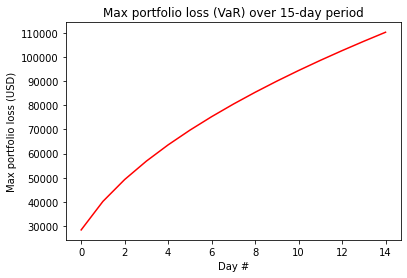

In [34]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")

#Checking distributions of our equities against normal distribution
we are assuming that the returns of the equities in our portfolio are normally distributed when calculating VaR. Of course, we can't predict that moving forward, but we can at least check how the historical returns have been distributed to help us assess whether VaR is suitable to use for our portfolio.

In [38]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy

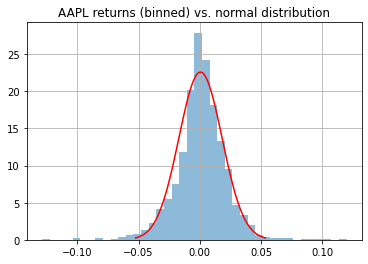

In [41]:
# Repeat for each equity in portfolio
returns['AAPL'].hist(bins=40,density = True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("AAPL returns (binned) vs. normal distribution")
plt.show()